# TDA Ensemble (Set)

Un **ensemble** est un type de donnéee abstrait qui stocke des valeurs **sans répétition**: ajouter une valeur déjà présente est sans effet. Les opérations essentielles sont

* vérifier si un élément est présent
* ajouter un élément s'il est absent
* supprimer un élément 

Un **ensemble ordonné** est un ensemble qui stocke les valeurs triées selon un critère. Cela peut faciliter l'opération de recherche d'un élément.  

Les ensembles ordonnés sont typiquement **mis en oeuvre** au moyen d'arbres binaires de recherche. Les ensemble non-ordonnés utilisent plutôt des tables de hachage (voir ASD2) 

On doit pouvoir mettre en oeuvre efficement les opérations de [théorie des ensembles](https://fr.wikipedia.org/wiki/Théorie_des_ensembles) (Georg Cantor, $19^{eme}$ siècle).

* Union: $A \cup B = \{ x : x \in A \lor x \in B \}$


* Intersection: $A \cap B = \{ x : x \in A \land x \in B \}$


* Différence: $A \setminus B = \{ x : x \in A \land x \notin B \}$


* Sous-ensemble: $A \subseteq B$ si $\forall x \in A, x \in B$

In [171]:
import include.helpers as h

## Arbre binaire de recherche

Pour écrire notre classe, nous utilisons un arbre binaire de recherche dont les noeuds sont 

In [172]:
class Noeud:
    def __init__(self,val,p = None, 
                 g = None, d = None):
        self.clef = val
        self.parent = p
        self.gauche = g
        self.droite = d   
    def __str__(self): 
        return "{}".format(self.clef)

Nous y ajoutons les fonctions suivantes

In [181]:
# insère dans l'ABR de racine R si val est absent 

def inserer(R,val,p = None):
    c = 1
    if R == None:      R = Noeud(val, p);   
    elif val < R.clef: R.gauche, c = inserer(R.gauche,val,R)    
    elif val > R.clef: R.droite, c = inserer(R.droite,val,R)
    else:              c = 0
    return R, c

In [182]:
# construit un ABR à partir d'un contenant T itérable, sans duplication

def creer_ABR(T):
    R = None; n = 0
    for t in T: 
        R, c = inserer(R,t)
        n += c
    return R, n

In [183]:
# retourne le contenu trié de l'ABR dans une string

def str_trie(R):
    s = ""
    if R:
        s += str_trie(R.gauche)
        s += R.__str__() + " "
        s += str_trie(R.droite)
    return s

In [184]:
# copie récursivement tout l'ABR dont R est la racine

def copier_rec(R, p = None):
    if R:
        C = Noeud(R.clef, p)
        C.gauche = copier_rec(R.gauche,C)
        C.droite = copier_rec(R.droite,C)
        return C
    else: return None

In [185]:
# fonctions d'itération

def noeud_min(R):     
    return noeud_min(R.gauche) if R.gauche else R

def suivant(n):
    if n.droite:
        return noeud_min(n.droite)
    else:
        while n.parent and n.parent.gauche != n:
            n = n.parent
        return n.parent

## Classe Ensemble

Ces fonctions nous permettent de définir une classe Ensemble minimaliste, qui a comme  attributs `R` la racine de l'ABR stockant les éléments, et `n` le nombre d'éléments

In [186]:
class Ensemble:
    def __init__(self,T = []):
        self.R, self.n = creer_ABR(T)  
    def __str__(self):
        return str_trie(self.R)
    def copier(self):
        E = Ensemble()
        E.R = copier_rec(self.R)
        E.n = self.n
        return E
    def inserer(self,val):
        self.R, c = inserer(self.R,val)
        self.n += c

Créons un ensemble `E1` avec les multiples de 3 de 0 à 15

0 3 6 9 12 15 


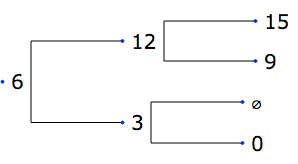

In [187]:
T1 = [ 6, 12, 3, 0, 9, 15 , 3, 6, 3, 12 ]
E1 = Ensemble(T1)
print(E1)
h.afficher_arbre_binaire(E1.R)

Créons un ensemble `E2` avec les multiples de 2 de 0 à 12

0 2 4 6 8 10 12 


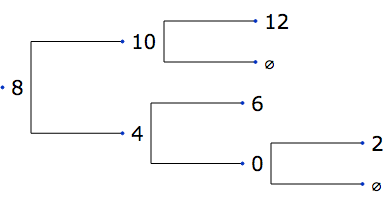

In [188]:
T2 = [ 8, 4, 0, 2, 6, 10, 12 ]
E2 = Ensemble(T2)
print(E2)
h.afficher_arbre_binaire(E2.R)

## Union

Pour mettre en oeuvre l'union ensembliste $A \cup B = \{ x : x \in A \lor x \in B \}$, le plus simple est d'insérer tous les éléments d'un ensemble dans l'autre

In [189]:
def union_ensembles(A,B):
    U = A.copier()
    b = noeud_min(B.R)
    while b:
        U.inserer(b.clef)
        b = suivant(b)
    return U

In [190]:
E3 = union_ensembles(E1,E2)
print(E1); print(E2); print(E3)

0 3 6 9 12 15 
0 2 4 6 8 10 12 
0 2 3 4 6 8 9 10 12 15 


Soient $n$ et $m$ les tailles des ensembles `A` et `B`.

* La copie de A a une complexité $O(n)$. 

* Si les arbres sont équilibrés, chacune des $m$ insertions a une complexité $O(\log(m+n))$ 

La complexité totale est donc $O(n + m \log(m+n))$. 

Peut-on faire mieux ?

Oui. Il faut

* parcourir les deux arbres simultanément par ordre croissant


* en n'avançant que dans l'arbre ayant l'élément courrant le plus petit


* en insérant dans l'union comme si son ABR était une liste simplement chainée par les pointeurs gauches, 


* donc en tête de liste, l'élément à insérer étant plus grand que les précédents


Toutes ces opérations sont individuellement $\Theta(1)$, et donc en tout $\Theta(m+n)$

In [191]:
def union_ensembles(A,B):
    U = Ensemble();
    a = noeud_min(A.R); b = noeud_min(B.R)
    while a and b:
        if a.clef < b.clef:
            U.R = Noeud(a.clef,g = U.R); a = suivant(a)
        elif a.clef > b.clef:
            U.R = Noeud(b.clef,g = U.R); b = suivant(b)
        else: # a == b
            U.R = Noeud(a.clef,g = U.R)
            a = suivant(a); b = suivant(b)
        U.n += 1  
    while a:
        U.R = Noeud(a.clef,g = U.R)
        a = suivant(a); U.n += 1     
    while b:
        U.R = Noeud(a.clef,g = U.R)
        a = suivant(a); U.n += 1
    return U

L'algorithme fonctionne en temps linéaire, mais il produit un arbre dégénéré

0 3 6 9 12 15 
0 2 4 6 8 10 12 
0 2 3 4 6 8 9 10 12 15 


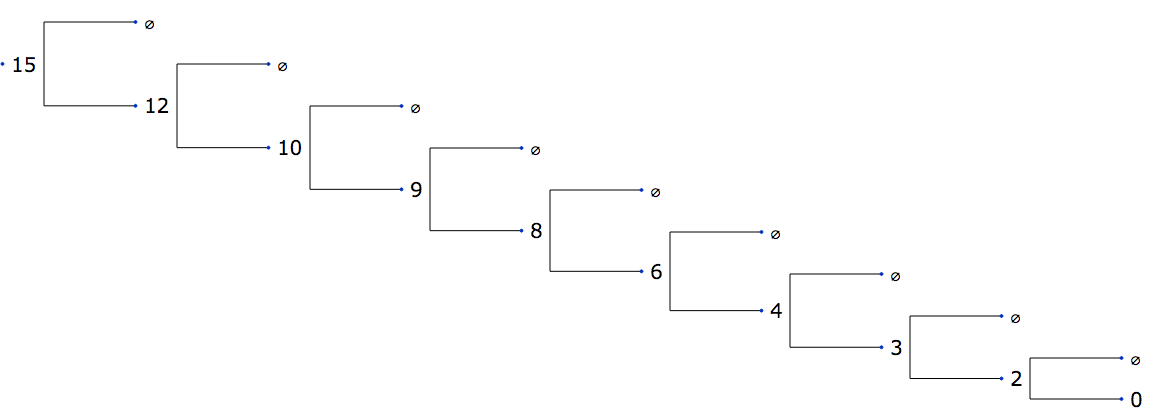

In [197]:
E4 = union_ensembles(E1,E2)
print(E1); print(E2); print(E4)
h.afficher_arbre_binaire(E4.R)

Heureusement, on peut l'arboriser similairement à l'algorithme vu précédemment pour un ABR dégénéré vers la droite. 

In [192]:
def arboriser_gauche(L,n):
    if n == 0: return None, L
        
    RD, L = arboriser_gauche(L,(n-1)//2)
    
    R = L
    R.droite = RD
    L = L.gauche
    
    R.gauche , L = arboriser_gauche(L,n//2)

    R.parent = None
    if R.gauche: R.gauche.parent = R
    if R.droite: R.droite.parent = R
    return R, L

Le résultat est probant

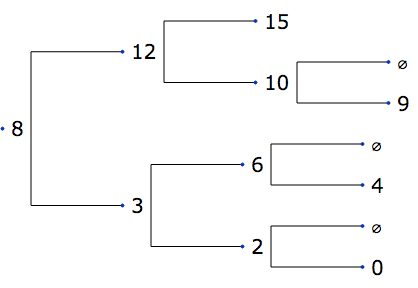

In [199]:
E4.R, L = arboriser_gauche(E4.R,E4.n)
h.afficher_arbre_binaire(E4.R)

## Intersection

L'algorithme d'intersection $A \cap B = \{ x : x \in A \land x \in B \}$ fonctionne sur le même principe

In [201]:
def intersection_ensembles(A,B):
    U = Ensemble();
    a = noeud_min(A.R); b = noeud_min(B.R)
    while a and b:
        if a.clef < b.clef:
            a = suivant(a)
        elif a.clef > b.clef:
            b = suivant(b)
        else: # a == b
            U.R = Noeud(a.clef,g = U.R)
            a = suivant(a); b = suivant(b)
            U.n += 1 
    U.R, L = arboriser_gauche(U.R,U.n)
    return U

0 3 6 9 12 15 
0 2 4 6 8 10 12 
0 6 12 


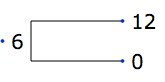

In [202]:
E5 = intersection_ensembles(E1,E2)
print(E1); print(E2); print(E5)
h.afficher_arbre_binaire(E5.R)

## Différence

De même pour la différence $A \setminus B = \{ x : x \in A \land x \notin B \}$.

In [206]:
def difference_ensembles(A,B):
    U = Ensemble();
    a = noeud_min(A.R); b = noeud_min(B.R)
    while a:
        while b and b.clef < a.clef:
            b = suivant(b)
        if b == None or a.clef < b.clef:
            U.R = Noeud(a.clef,g = U.R)
            U.n += 1 
        a = suivant(a)
    U.R, L = arboriser_gauche(U.R,U.n)
    return U

0 3 6 9 12 15 
0 2 4 6 8 10 12 
3 9 15 


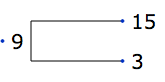

In [207]:
E6 = difference_ensembles(E1,E2)
print(E1); print(E2); print(E6)
h.afficher_arbre_binaire(E6.R)

## Sous-ensemble

Et de même pour le test de sous-ensemble $A \subseteq B$ si $\forall x \in A, x \in B$

In [209]:
def est_sous_ensemble(A,B):
    a = noeud_min(A.R); b = noeud_min(B.R)
    while a:
        while b and b.clef < a.clef:
            b = suivant(b)
        if b == None or a.clef < b.clef:
            return False 
        a = suivant(a)
    return True

In [220]:
def test(A,B):
    print("{{{}}} ⊆ {{{}}}".format(A,B).ljust(50),
            est_sous_ensemble(A,B))
    
test(E1,E1)
test(E1,E2)
test(E2,E1)
test(E1,E3)
test(E1,E5)
test(E5,E1)
test(E6,E5)

{0 3 6 9 12 15 } ⊆ {0 3 6 9 12 15 }                True
{0 3 6 9 12 15 } ⊆ {0 2 4 6 8 10 12 }              False
{0 2 4 6 8 10 12 } ⊆ {0 3 6 9 12 15 }              False
{0 3 6 9 12 15 } ⊆ {0 2 3 4 6 8 9 10 12 15 }       True
{0 3 6 9 12 15 } ⊆ {0 6 12 }                       False
{0 6 12 } ⊆ {0 3 6 9 12 15 }                       True
{3 9 15 } ⊆ {0 6 12 }                              False


## Conclusion

Les arbres binaires de recherche permettent de mettre en oeuvre le type de donnée abstrait `Ensemble` efficacement. En pratique, il s'agit même d'un **ensemble ordonné** 

Les **opérations élémentaires** (insertion, recherche, suppression) ont une complexité **logarithmique** si les arbres sont équilibrés. 

Les **opérations ensemblistes** (union, intersection, différence, inclusion) ont une complexité

* linéarithmique s'ils sont mis en oeuvre naïvement au moyen des opérations élémentaires


* **linéraire** en utilisant les parcours par itérateur et l'arborisation 

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>